# Image Classification using CNN
In this report, it will evaluate the image classification, typically CIFAR-10 having 10 classes.

The development is proceeded with "tensorflow, keras, matplotlib, numpy, sklearn and metric" technologies. The images will be classified in two different method: Artificial Neural Network and Convolutional Neural Network. Then, the results will be compared and see better networking for classification. Lastly, the prediction will be made.

In [ ]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_train[0] # 32X32

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train = y_train.reshape(-1,) # second dimension == flatten == blank
y_train[:5] # now one dimensional array printed

array([6, 9, 9, 4, 1], dtype=uint8)

For the shape of training, two dimensional array is not needed. Opposingly, categorizing is needed. Therefore, y_train can be reshaped.

In [ ]:
y_test = y_test.reshape(-1,)

With reshaped train and test to be in one-dimensional array, the classes are then can be evaluated.

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

It defines the 10 classes, where the pictures need to be classified.

Then the classes can be printed by classes[index].
Therefore the x_label classes can be re written as plt.xlabel(classes[y[index]]).

In [ ]:
def plot_sample(X, y, index): # to print out the picture that I want only
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]]) # print out the x label --> i.g. whether it is frog / train = classes
    # but how to use the classes? --> need to define y

plt.imshow(X_train[n]):
It will print out the picture that needs classification.
This is printed in 32X32 pixels.

It also prints out the size of the image.

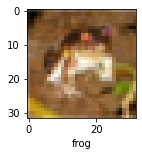

In [ ]:
plot_sample(X_train, y_train, 0)

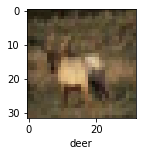

In [ ]:
plot_sample(X_train, y_train, 3)

# Artificial Neural Network

In [ ]:
# apply to all the image inputs
X_train = X_train / 255
X_test = X_test / 255

Now the data is needed to be normalized. This is required to ensure how the data is look like, the data reads and utilization by the recorded database.

To normalize in ANN, images are divided by each pixel value, 255. This represents the RGB maximum value.

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape = (32, 32, 3)), # first layer which accepts 32X32X3
        layers.Dense(3000, activation = 'relu'), # having 3000 neurons
        layers.Dense(1000, activation = 'relu'), # 1000 neurons
        layers.Dense(10, activation = 'sigmoid') # then 10 categories
])

# dense artificial neural network with the following parameters
ann.compile(optimizer = 'SGD',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5) # accuracy == low for training
# artifical neural network performs bad with 5 epochs

Epoch 1/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.8121 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.6224 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.5410 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4801 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4323 - accuracy: 0.4956


Notice on the performance of the Artificial Neural Network.

The parameter of loos in compilation function can be inputted with two distinct entropies, "categorical crossentropy" and "sparse categorical crossentropy".
The difference between them is that categorical crossentropy uses matrix to retrieve the image, where sparsed one uses a value.

Therefore, since the above codes used values to get the class and image, it uses "spare categorical crossentropy" for loss parameter.

In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.5281 - accuracy: 0.4565


[1.5281258821487427, 0.45649999380111694]

The test case matrices and 1-dimension of size 10 is evaluated for total accuracy.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes, zero_division='warn'))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.49      0.54      1000
           1       0.51      0.64      0.57      1000
           2       0.43      0.30      0.36      1000
           3       0.36      0.31      0.33      1000
           4       0.42      0.38      0.40      1000
           5       0.45      0.31      0.36      1000
           6       0.65      0.32      0.43      1000
           7       0.35      0.74      0.48      1000
           8       0.77      0.37      0.50      1000
           9       0.42      0.71      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



The above result is a classificantion report which can look at the accuracy percentage for each classes.

# Convolutional Neural Network

In [ ]:
cnn = models.Sequential([
        # cnn
        layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = [32, 32, 3]), # 3X3 kernel, 32 filters
        layers.MaxPooling2D((2, 2)), # less expensive to calculate

        layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'), 
        layers.MaxPooling2D((2, 2)),

        # dense network
        layers.Flatten(), # first layer which accepts 32X32X3
        layers.Dense(64, activation = 'relu'), # keep only one layer
        layers.Dense(10, activation = 'softmax') # normalize probability
]) # up-pooling

Convolution layers:

1. first one detects the loopy pattern
2. detecting the vertical line
3. detecting the diagonal line

Best thing about the cnn:
don't need to tell what the filters are.
It will figure out filter by itself, which filter size and how many filters are needed can be calculated by the convolution function itself.

In [ ]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4401 - accuracy: 0.4840
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0991 - accuracy: 0.6143
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9782 - accuracy: 0.6589
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8945 - accuracy: 0.6893
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8227 - accuracy: 0.7156
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7675 - accuracy: 0.7338
Epoch 7/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.7177 - accuracy: 0.7502
Epoch 8/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6724 - accuracy: 0.7665
Epoch 9/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6289 - accuracy: 0.7807
Epoch 10/10
1563/1563 [==============================] - 75s 48m

By the comparison from the above evaluated accuracies for ANN and CNN accuracies just computed, it is noticeable that CNN has higher accuracy for image classification.

In convolution layer, the normalization works little different from ANN. As it is mentioned in the above, ANN convolution layer is a simple division with RGB value. However, in CNN, the normalization is the addition of the neighboring epoch's accuracy and dividing from the targetting accuracy value from the added value. This will give the CNN normalization.

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9521 - accuracy: 0.6950


[0.9520777463912964, 0.6949999928474426]

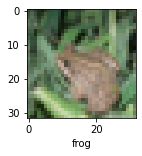

In [ ]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 4)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.71659573e-04, 1.17809495e-05, 3.00192996e-03, 6.72024786e-01,
        2.54418384e-02, 2.95990825e-01, 5.44330978e-04, 2.68791802e-03,
        1.08395332e-04, 1.65717429e-05],
       [6.01297652e-04, 1.85682718e-02, 3.51531611e-07, 3.56713116e-07,
        2.82566610e-08, 1.36845735e-09, 7.42670903e-09, 2.01399586e-09,
        9.80675519e-01, 1.54189664e-04],
       [4.28089976e-01, 8.39115605e-02, 3.06398049e-03, 2.16651428e-02,
        1.14944009e-02, 5.40626142e-03, 3.30867100e-04, 3.82964946e-02,
        2.08750203e-01, 1.98991060e-01],
       [9.78811562e-01, 1.35245873e-03, 4.98251151e-03, 7.24095386e-04,
        7.23237579e-04, 4.20362312e-06, 6.55311742e-04, 4.67214959e-05,
        1.20266089e-02, 6.73297502e-04],
       [8.07573088e-07, 2.29513020e-07, 7.24520013e-02, 9.87901236e-04,
        4.35364008e-01, 1.27325518e-04, 4.91059721e-01, 5.95260417e-07,
        7.35343338e-06, 5.76819303e-08]], dtype=float32)

The values in the array is probability distribution between 0 and 1.
To get the prediction value, find which element is max. This can be done by the use of argmax method.

In [ ]:
y_classes = [np.argmax(element) for element in y_pred] # the number displayed is the maximum element
y_classes[:5] # prediction

[3, 8, 0, 0, 6]

In [ ]:
y_test[:5] # expectation

array([3, 8, 8, 0, 6], dtype=uint8)

Although the predictions make some errors, results are almost the same and some are even difficult to recognize by human. Thus, the outcome is still reasonable with such errors.

In [ ]:
classes[y_classes[4]] # this is the actual value with input of 4 = 'frog' 
# the output = predicted value, it matches the expectation

'frog'